# Visualización de datasets con Geopandas

En este cuaderno mostramos la visualización de las secciones mediante la librería de Geopandas. El INE proporciona una vez al año las definiciones geométricas de las secciones electorales en formato shapely, y Geopandas utiliza éste por defento. Como su nombre indica, se trata de una librería integrada en pandas, y por lo tanto se puede desplegar en un cuaderno. Utilizaremos Geopandas para integrar nuestros datasets electorales, y lograr así una visualización bastante atractiva.

Tenemos que agraceder al usuario de github Shakasom, que proporciona el proceso de instalación al menos para google colab; normalmente la instalación de Geopandas es complicada. 

Estos son los comentarios de Shakasom sobre Geopandas, que desde luego es una persona más conocedora de la librería que nosotros:

_In this tutorial part, we will learn the basics of loading and processing geographic data using Geopandas. Geopandas is built on top of Pandas and Numpy libraries. Like Pandas Dataframe, Geopandas data structure contains GeodataFrame and GeoSeries. Geopandas provides not only the capability to read and manipulate geographic data easily but also can perform many essential geospatial operations including among others geometric operations and projections which it borrows from the Shapely library._

_You can visualize and plot maps with Geopandas (provides a high-level interface to Matplotlib library) by using the plot() method on GeodataFrame/GeoSeries. In the first section, we will learn about geographic data, geographic coordinates and loading/writing geospatial data._

Comenzamos instalando Geopandas en Colab, ya decimos que no es precisamente fácil.

In [1]:
%%time 

# Important library for many geopython libraries
#!apt install gdal-bin python-gdal python3-gdal 
# Install rtree - Geopandas requirment
#!apt install python3-rtree 
# Install Geopandas
#!pip install git+git://github.com/geopandas/geopandas.git
# Install descartes - Geopandas requirment
#!pip install descartes 
# Install Folium for Geographic data visualization
#!pip install folium
# Install plotlyExpress
#!pip install plotly_express

Wall time: 0 ns


Ahora cargamos las librerías necesarias, que incluyen varias que acabamos de instalar.

In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
from shapely.geometry import Point
import matplotlib
import matplotlib.pyplot as plt 
import folium
import plotly_express as px


In [2]:
#la primera vez...
!pip install boto3 

  Using cached s3transfer-0.5.0-py3-none-any.whl (79 kB)
  Using cached jmespath-0.10.0-py2.py3-none-any.whl (24 kB)


In [3]:
import boto3

BUCKET_NAME = 'electomedia' 

# sustituir por credenciales de acceso. 
s3 = boto3.resource('s3', aws_access_key_id = 'xxxxxxxxxx', 
                          aws_secret_access_key= 'xxxxxxxxxxxxxxx')

In [4]:
import botocore.exceptions

KEY = 'INE/SECC_CE_20190101.shp' # replace with your object key

try:
  # we are trying to download training dataset from s3 with name `my-training-data.csv` 
  # to colab dir with name `training.csv`
  s3.Bucket(BUCKET_NAME).download_file(KEY, 'SECC_CE_20190101.shp')
  
except botocore.exceptions.ClientError as e:
  if e.response['Error']['Code'] == "404":
    print("The object does not exist.")
  else:
    raise

Los ficheros shapely se componen a su vez de varios componentes, que son leidos cuando cargamos el de extensión .shp. A continuación hacemos lo propio con las secciones de 2019.

Vemos que se trata aparentemente un dataframe de pandas común, que contiene la definición geométrica de cada sección en la columna 'geometry', así como datos adicionales sobre las secciones, incluyendo su código.

In [5]:
secciones = gpd.read_file('SECC_CE_20190101.shp')

In [6]:
secciones.head()

OBJECTID       CUSEC  CUMUN CSEC CDIS CMUN CPRO CCA    CUDIS  CLAU2  ...  \
0         1  0100901001  01009  001   01  009   01  16  0100901  01009  ...   
1         2  0101001002  01010  002   01  010   01  16  0101001  01010  ...   
2         3  0103101001  01031  001   01  031   01  16  0103101  01031  ...   
3         4  0103301001  01033  001   01  033   01  16  0103301  01033  ...   
4         6  0103701001  01037  001   01  037   01  16  0103701  01037  ...   

  CNUT2 CNUT3 ESTADO   OBS    Shape_Leng    Shape_area     Shape_len  \
0     1     1      I  None  51725.353538  6.326080e+07  51725.353538   
1     1     1      I  None  13350.774728  7.332951e+06  13350.774728   
2     1     1      I  None  87711.717051  8.041601e+07  87711.717051   
3     1     1      I  None  12331.494377  5.950453e+06  12331.494377   
4     1     1      I  None  60761.315212  1.227207e+08  60761.315212   

   SUPERF_M2                 NMUN  \
0   63260804            Asparrena   
1    7332951          Ayala/Aiara   
2   80416015            Laguardia   
3    5950453  Lapuebla de Labarca   
4  122720687        Arraia-Maeztu   

                                            geometry  
0  MULTIPOLYGON (((556453.835 4752758.332, 556460...  
1  POLYGON ((502035.230 4771813.197, 502048.071 4...  
2  MULTIPOLYGON (((538984.636 4718139.608, 538985...  
3  POLYGON ((537063.531 4703664.589, 536887.844 4...  
4  POLYGON ((551570.951 4739269.962, 551570.889 4...  

[5 rows x 24 columns]

In [7]:
secciones.shape

(36317, 24)

Para pintar las secciones basta aplicar el método .plot, y obtenemos nuestro primer mapa.

<AxesSubplot:>

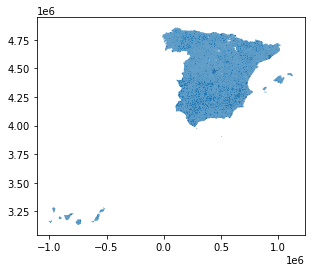

In [8]:
secciones.plot()

Podemos aplicar los métodos de pandas para pintar, por ejemplo, la provincia de Álava.

<AxesSubplot:>

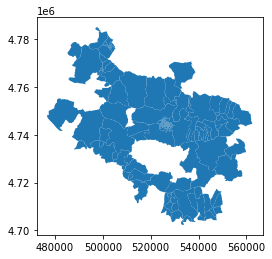

In [9]:
secciones.loc[secciones['NPRO'] == 'Araba/Álava'].plot()

El dataframe tiene sus columnas, como cualquier otro, pero en este caso hay una, ya mencionada, que es de tipo geometry.

In [10]:
secciones.dtypes

OBJECTID         int64
CUSEC           object
CUMUN           object
CSEC            object
CDIS            object
CMUN            object
CPRO            object
CCA             object
CUDIS           object
CLAU2           object
NPRO            object
NCA             object
CNUT0           object
CNUT1           object
CNUT2           object
CNUT3           object
ESTADO          object
OBS             object
Shape_Leng     float64
Shape_area     float64
Shape_len      float64
SUPERF_M2        int64
NMUN            object
geometry      geometry
dtype: object

Podemos pintar municipios también, en este caso el de Fuengirola. Vemos que geopandas tiene el color azul como fondo por defecto. Luego modificaremos esto.

<AxesSubplot:>

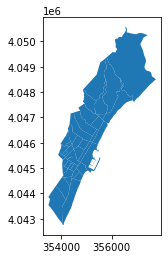

In [11]:
secciones.loc[secciones['CUMUN'] == '29054'].plot()

In [12]:
secciones

OBJECTID       CUSEC  CUMUN CSEC CDIS CMUN CPRO CCA    CUDIS  CLAU2  \
0             1  0100901001  01009  001   01  009   01  16  0100901  01009   
1             2  0101001002  01010  002   01  010   01  16  0101001  01010   
2             3  0103101001  01031  001   01  031   01  16  0103101  01031   
3             4  0103301001  01033  001   01  033   01  16  0103301  01033   
4             6  0103701001  01037  001   01  037   01  16  0103701  01037   
...         ...         ...    ...  ...  ...  ...  ...  ..      ...    ...   
36312     10673  1509302002  15093  002   02  093   15  12  1509302  15093   
36313     10659  1590203001  15902  001   03  902   15  12  1590203    902   
36314     10189  1503103003  15031  003   03  031   15  12  1503103  15031   
36315     13100  2101701002  21017  002   01  017   21  01  2101701  21017   
36316     35989  2906707064  29067  064   07  067   29  01  2906707  29067   

       ... CNUT2 CNUT3 ESTADO                                    OBS  \
0      ...     1     1      I                                   None   
1      ...     1     1      I                                   None   
2      ...     1     1      I                                   None   
3      ...     1     1      I                                   None   
4      ...     1     1      I                                   None   
...    ...   ...   ...    ...                                    ...   
36312  ...     1     1      M                                   None   
36313  ...     1     1      M                                   None   
36314  ...     1     1      I                                   None   
36315  ...     1     5      I                                   None   
36316  ...     1     7      M  Se fusionan las secciones 7-26 y 7-64   

          Shape_Leng    Shape_area      Shape_len  SUPERF_M2  \
0       51725.353538  6.326080e+07   51725.353538   63260804   
1       13350.774728  7.332951e+06   13350.774728    7332951   
2       87711.717051  8.041601e+07   87711.717051   80416015   
3       12331.494377  5.950453e+06   12331.494377    5950453   
4       60761.315212  1.227207e+08   60761.315212  122720687   
...              ...           ...            ...        ...   
36312   22560.055555  4.284650e+07   40586.196381   24043055   
36313   39748.841339  8.001400e+07   48119.741688   51117047   
36314   21911.587016  1.727445e+07   21911.587016     465839   
36315  103495.806720  2.784394e+08  103495.806720  238041207   
36316     815.812813  4.022523e+04     953.832423      11909   

                      NMUN                                           geometry  
0                Asparrena  MULTIPOLYGON (((556453.835 4752758.332, 556460...  
1              Ayala/Aiara  POLYGON ((502035.230 4771813.197, 502048.071 4...  
2                Laguardia  MULTIPOLYGON (((538984.636 4718139.608, 538985...  
3      Lapuebla de Labarca  POLYGON ((537063.531 4703664.589, 536887.844 4...  
4            Arraia-Maeztu  POLYGON ((551570.951 4739269.962, 551570.889 4...  
...                    ...                                                ...  
36312                  Zas  POLYGON ((17713.727 4798559.174, 17794.388 479...  
36313          Oza-Cesuras  POLYGON ((75420.668 4796270.576, 75442.668 479...  
36314            Culleredo  POLYGON ((59718.470 4802760.627, 59735.222 480...  
36315              Calañas  POLYGON ((151385.134 4180084.902, 151402.134 4...  
36316               Málaga  POLYGON ((372352.294 4067015.716, 372339.457 4...  

[36317 rows x 24 columns]

Un factor crucial es la proyección con la que pintamos las secciones. En este caso es la 25830, que viene definida en los ficheros proporcionados por el INE en formato shapely.

In [13]:
secciones.crs

<Projected CRS: EPSG:25830>
Name: ETRS89 / UTM zone 30N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Europe between 6°W and 0°W: Faroe Islands offshore; Ireland - offshore; Jan Mayen - offshore; Norway including Svalbard - offshore; Spain - onshore and offshore.
- bounds: (-5.9999999999999, 35.265663028, 1.7053025658242e-13, 80.489344496333)
Coordinate Operation:
- name: UTM zone 30N
- method: Transverse Mercator
Datum: European Terrestrial Reference System 1989 ensemble
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

Los métodos de matplotlib son también aplicables, y podemos engrandecer el mapa, en este caso el de la Comunidad de Madrid.

<AxesSubplot:>

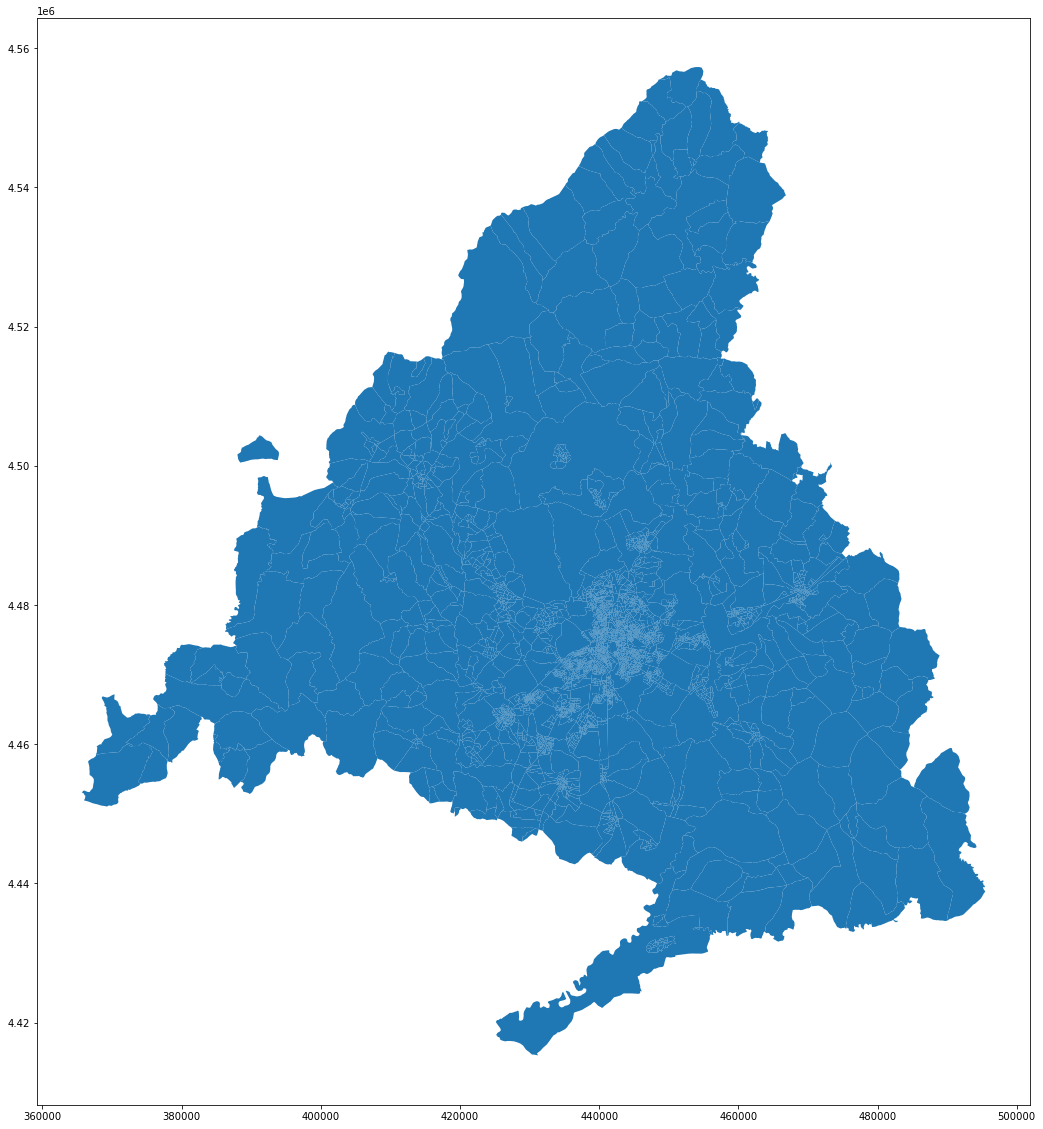

In [14]:
secciones.loc[secciones['NPRO'] == 'Madrid'].plot(figsize = (20,20))

Este es un primer ejemplo del plano concreto del centro de Madrid, ya con los colores cambiados, y definiendo el color de los bordes.

(4465000.0, 4485000.0)

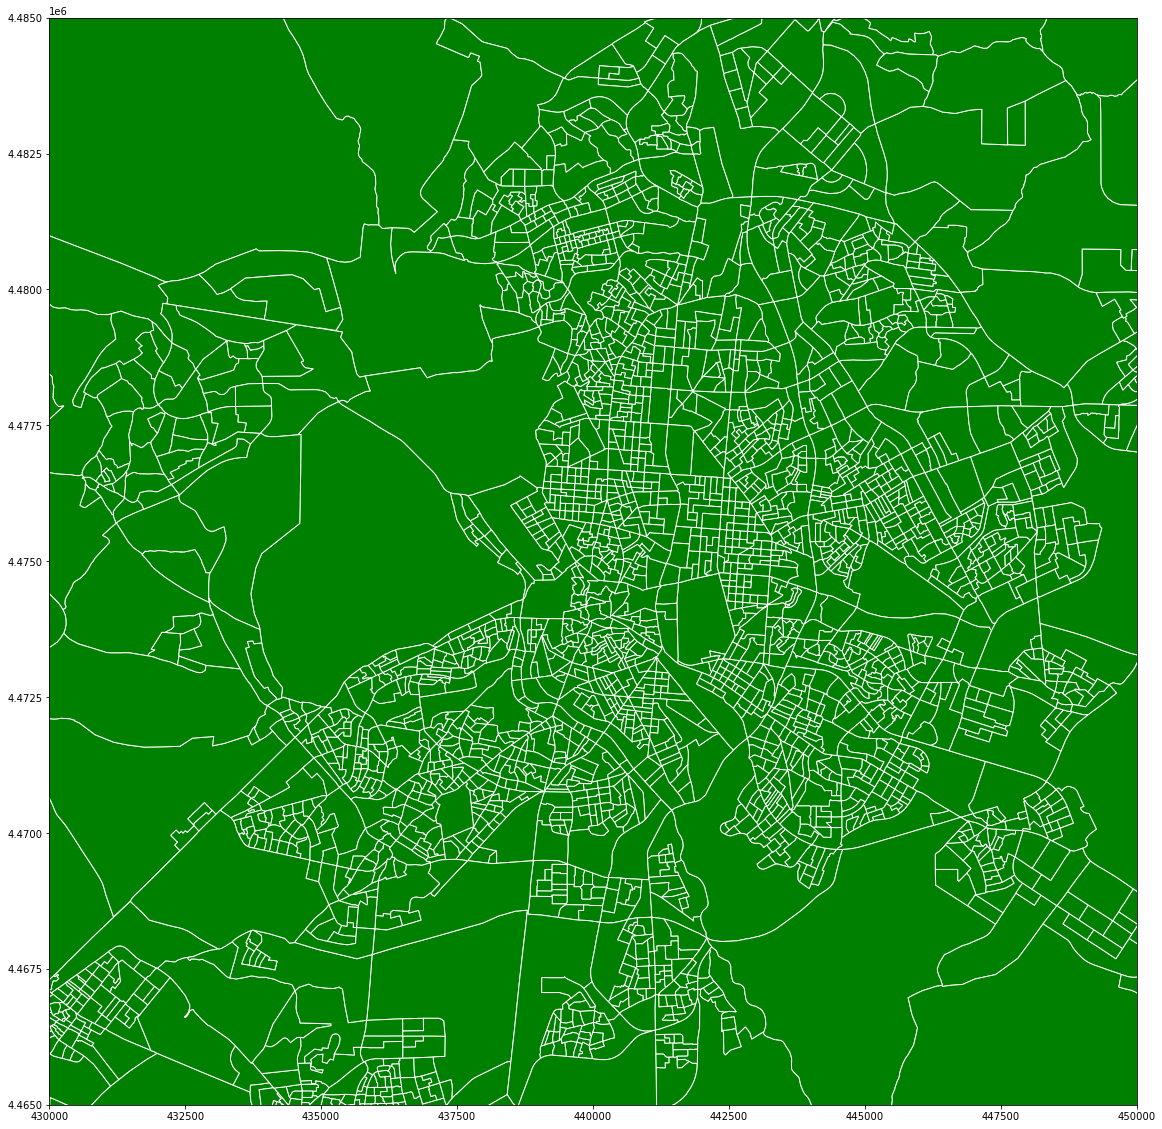

In [15]:
ax = secciones.loc[secciones['NPRO'] == 'Madrid'].plot(figsize = (20,20), color = 'green', edgecolor = 'white', linewidth = 1)
ax.set_xlim([430000, 450000])
ax.set_ylim([4465000, 4485000])

Si seleccionamos una columna, geopandas nos colorea las secciones según ella, en este caso la de las CCAA.

<AxesSubplot:>

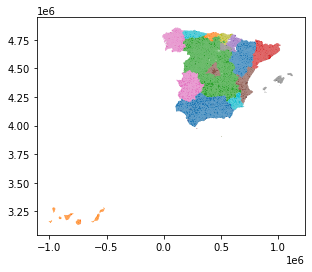

In [16]:
secciones.plot(column = 'NCA')

Un ejemplo similar con las provincias.

<AxesSubplot:>

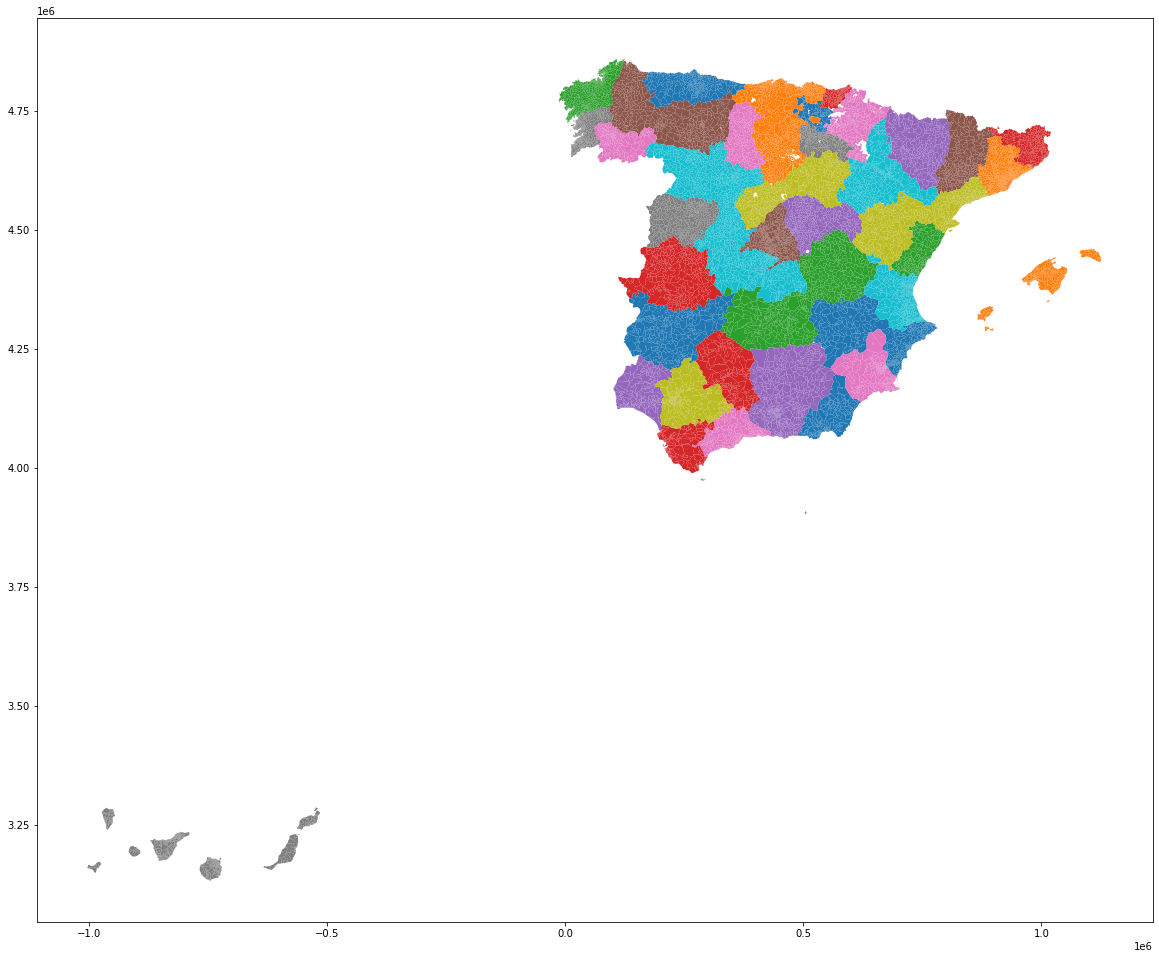

In [17]:
secciones.plot(column = 'NPRO', figsize = (20,20))

In [19]:
secciones.to_file("secciones_A19.shp")

Un método fundamental para nosotros de Geopandas es que podemos pasar un fichero shapely a geojson con facilidad, como hacemos a continuación.

In [16]:
secciones.to_file("secciones_A19_geojson.geojson", driver='GeoJSON')

In [20]:
secciones

OBJECTID       CUSEC  CUMUN CSEC CDIS CMUN CPRO CCA    CUDIS  CLAU2  \
0             1  0100901001  01009  001   01  009   01  16  0100901  01009   
1             2  0101001002  01010  002   01  010   01  16  0101001  01010   
2             3  0103101001  01031  001   01  031   01  16  0103101  01031   
3             4  0103301001  01033  001   01  033   01  16  0103301  01033   
4             6  0103701001  01037  001   01  037   01  16  0103701  01037   
...         ...         ...    ...  ...  ...  ...  ...  ..      ...    ...   
36312     10673  1509302002  15093  002   02  093   15  12  1509302  15093   
36313     10659  1590203001  15902  001   03  902   15  12  1590203    902   
36314     10189  1503103003  15031  003   03  031   15  12  1503103  15031   
36315     13100  2101701002  21017  002   01  017   21  01  2101701  21017   
36316     35989  2906707064  29067  064   07  067   29  01  2906707  29067   

       ... CNUT2 CNUT3 ESTADO                                    OBS  \
0      ...     1     1      I                                   None   
1      ...     1     1      I                                   None   
2      ...     1     1      I                                   None   
3      ...     1     1      I                                   None   
4      ...     1     1      I                                   None   
...    ...   ...   ...    ...                                    ...   
36312  ...     1     1      M                                   None   
36313  ...     1     1      M                                   None   
36314  ...     1     1      I                                   None   
36315  ...     1     5      I                                   None   
36316  ...     1     7      M  Se fusionan las secciones 7-26 y 7-64   

          Shape_Leng    Shape_area      Shape_len  SUPERF_M2  \
0       51725.353538  6.326080e+07   51725.353538   63260804   
1       13350.774728  7.332951e+06   13350.774728    7332951   
2       87711.717051  8.041601e+07   87711.717051   80416015   
3       12331.494377  5.950453e+06   12331.494377    5950453   
4       60761.315212  1.227207e+08   60761.315212  122720687   
...              ...           ...            ...        ...   
36312   22560.055555  4.284650e+07   40586.196381   24043055   
36313   39748.841339  8.001400e+07   48119.741688   51117047   
36314   21911.587016  1.727445e+07   21911.587016     465839   
36315  103495.806720  2.784394e+08  103495.806720  238041207   
36316     815.812813  4.022523e+04     953.832423      11909   

                      NMUN                                           geometry  
0                Asparrena  MULTIPOLYGON (((556453.835 4752758.332, 556460...  
1              Ayala/Aiara  POLYGON ((502035.230 4771813.197, 502048.071 4...  
2                Laguardia  MULTIPOLYGON (((538984.636 4718139.608, 538985...  
3      Lapuebla de Labarca  POLYGON ((537063.531 4703664.589, 536887.844 4...  
4            Arraia-Maeztu  POLYGON ((551570.951 4739269.962, 551570.889 4...  
...                    ...                                                ...  
36312                  Zas  POLYGON ((17713.727 4798559.174, 17794.388 479...  
36313          Oza-Cesuras  POLYGON ((75420.668 4796270.576, 75442.668 479...  
36314            Culleredo  POLYGON ((59718.470 4802760.627, 59735.222 480...  
36315              Calañas  POLYGON ((151385.134 4180084.902, 151402.134 4...  
36316               Málaga  POLYGON ((372352.294 4067015.716, 372339.457 4...  

[36317 rows x 24 columns]

In [22]:
import botocore.exceptions

KEY = 'datos-elecciones-generales-unificados/gen_A19_unif_cols_prov_copia.txt' # replace with your object key

try:
  # we are trying to download training dataset from s3 with name `my-training-data.csv` 
  # to colab dir with name `training.csv`
  s3.Bucket(BUCKET_NAME).download_file(KEY, 'gen_A19_unif_cols_prov_copia.txt')
  
except botocore.exceptions.ClientError as e:
  if e.response['Error']['Code'] == "404":
    print("The object does not exist.")
  else:
    raise

Ahora podemos cargar nuestro dataset de las elecciones de abril de 2019, al que correspondería la definición de las secciones con shapely.

In [21]:
cols_str = {'cod_ccaa' : 'str', 'cod_prov' : 'str', 'cod_mun' : 'str', 'cod_sec' : 'str', 'cod_grupo' : 'str'}

In [23]:
df_secciones = pd.read_csv('gen_A19_unif_cols_prov_copia.txt', dtype = cols_str)

In [24]:
df_secciones

Sección cod_ccaa cod_prov cod_mun     cod_sec       CCAA  \
0      022019041010400101001       01       04   04001  0400101001  Andalucía   
1      022019041010400201001       01       04   04002  0400201001  Andalucía   
2      022019041010400301001       01       04   04003  0400301001  Andalucía   
3      022019041010400301002       01       04   04003  0400301002  Andalucía   
4      022019041010400301003       01       04   04003  0400301003  Andalucía   
...                      ...      ...      ...     ...         ...        ...   
36312  022019041195200108011       19       52   52001  5200108011    Melilla   
36313  022019041195200108012       19       52   52001  5200108012    Melilla   
36314  022019041195200108013       19       52   52001  5200108013    Melilla   
36315  022019041195200108014       19       52   52001  5200108014    Melilla   
36316  022019041195200108015       19       52   52001  5200108015    Melilla   

      Provincia Municipio  Censo_Esc  Votos_Total  ...  Renta hogar 2015  \
0       Almería      Abla       1014          768  ...           19546.0   
1       Almería  Abrucena       1039          798  ...           17115.0   
2       Almería      Adra        671          519  ...           24688.0   
3       Almería      Adra       1282          954  ...           23400.0   
4       Almería      Adra       1535         1087  ...           19687.0   
...         ...       ...        ...          ...  ...               ...   
36312   Melilla   Melilla       1605         1118  ...           62632.0   
36313   Melilla   Melilla       1676         1207  ...           50839.0   
36314   Melilla   Melilla       1156          738  ...           36729.0   
36315   Melilla   Melilla        905          593  ...           31384.0   
36316   Melilla   Melilla       1657         1117  ...           38863.0   

       Renta Salarios 2018  Renta Salarios 2015  Renta Pensiones 2018  \
0                   5574.0               4833.0                3286.0   
1                   4640.0               4048.0                3418.0   
2                   5121.0               4795.0                2499.0   
3                   5381.0               4837.0                1815.0   
4                   5224.0               4044.0                1170.0   
...                    ...                  ...                   ...   
36312              11378.0              11119.0                1508.0   
36313              13272.0              13038.0                2763.0   
36314              10102.0               9640.0                1807.0   
36315               5923.0               6061.0                2463.0   
36316              10651.0               9570.0                1724.0   

       Renta Pensiones 2015  Renta Desempleo 2018  Renta Desempleo 2015  \
0                    3082.0                 403.0                 471.0   
1                    2770.0                 568.0                 620.0   
2                    2301.0                 337.0                 333.0   
3                    1724.0                 343.0                 464.0   
4                    1198.0                 416.0                 476.0   
...                     ...                   ...                   ...   
36312                1274.0                 167.0                 166.0   
36313                2445.0                 169.0                 177.0   
36314                1615.0                 234.0                 252.0   
36315                2136.0                 244.0                 284.0   
36316                1638.0                 203.0                 218.0   

                                                dict_res  \
0      {'PP': 149, 'PSOE': 326, 'Cs': 131, 'UP': 44, ...   
1      {'PP': 127, 'PSOE': 380, 'Cs': 91, 'UP': 60, '...   
2      {'PP': 162, 'PSOE': 131, 'Cs': 68, 'UP': 44, '...   
3      {'PP': 239, 'PSOE': 241, 'Cs': 166, 'UP': 62, ...   
4      {'PP': 274, 'PSOE': 252, 'Cs': 170, 'UP': 67, ... 

In [25]:
df_secciones.dtypes

Sección                  object
cod_ccaa                 object
cod_prov                 object
cod_mun                  object
cod_sec                  object
                         ...   
Renta Desempleo 2018    float64
Renta Desempleo 2015    float64
dict_res                 object
dict_res_ord             object
cod_grupo                object
Length: 98, dtype: object

Cambiamos el nombre de la columna del código de sección para que coincida con el que el tiene la definición geométrica.

In [26]:
df_secciones = df_secciones.rename(columns = {'cod_sec': 'CUSEC'})

In [27]:
secciones.columns

Index(['OBJECTID', 'CUSEC', 'CUMUN', 'CSEC', 'CDIS', 'CMUN', 'CPRO', 'CCA',
       'CUDIS', 'CLAU2', 'NPRO', 'NCA', 'CNUT0', 'CNUT1', 'CNUT2', 'CNUT3',
       'ESTADO', 'OBS', 'Shape_Leng', 'Shape_area', 'Shape_len', 'SUPERF_M2',
       'NMUN', 'geometry'],
      dtype='object')

Ahora hacemos el merge de ambos datasets. De esta forma tenemos la definición geométrica y los datos del dataset electoral en uno solo.

In [28]:
secciones = pd.merge(secciones, df_secciones, how="left", on=['CUSEC'])

In [29]:
secciones

OBJECTID       CUSEC  CUMUN CSEC CDIS CMUN CPRO CCA    CUDIS  CLAU2  \
0             1  0100901001  01009  001   01  009   01  16  0100901  01009   
1             2  0101001002  01010  002   01  010   01  16  0101001  01010   
2             3  0103101001  01031  001   01  031   01  16  0103101  01031   
3             4  0103301001  01033  001   01  033   01  16  0103301  01033   
4             6  0103701001  01037  001   01  037   01  16  0103701  01037   
...         ...         ...    ...  ...  ...  ...  ...  ..      ...    ...   
36312     10673  1509302002  15093  002   02  093   15  12  1509302  15093   
36313     10659  1590203001  15902  001   03  902   15  12  1590203    902   
36314     10189  1503103003  15031  003   03  031   15  12  1503103  15031   
36315     13100  2101701002  21017  002   01  017   21  01  2101701  21017   
36316     35989  2906707064  29067  064   07  067   29  01  2906707  29067   

       ... Renta hogar 2015 Renta Salarios 2018 Renta Salarios 2015  \
0      ...          30412.0                 NaN                 NaN   
1      ...          36309.0                 NaN                 NaN   
2      ...          29985.0                 NaN                 NaN   
3      ...          26163.0                 NaN                 NaN   
4      ...          33591.0                 NaN                 NaN   
...    ...              ...                 ...                 ...   
36312  ...          25600.0              4552.0              3987.0   
36313  ...          23564.0              6160.0              4772.0   
36314  ...          22079.0              7204.0              6545.0   
36315  ...          22258.0              7442.0              5969.0   
36316  ...          11771.0              1767.0              1349.0   

      Renta Pensiones 2018 Renta Pensiones 2015 Renta Desempleo 2018  \
0                      NaN                  NaN                  NaN   
1                      NaN                  NaN                  NaN   
2                      NaN                  NaN                  NaN   
3                      NaN                  NaN                  NaN   
4                      NaN                  NaN                  NaN   
...                    ...                  ...                  ...   
36312               4042.0               3838.0                301.0   
36313               4480.0               4410.0                236.0   
36314               3999.0               3618.0                222.0   
36315               2970.0               2820.0                358.0   
36316               1201.0                993.0                431.0   

      Renta Desempleo 2015                                           dict_res  \
0                      NaN  {'PP': 28, 'PSOE': 113, 'Cs': 7, 'UP': 163, 'I...   
1                      NaN  {'PP': 32, 'PSOE': 91, 'Cs': 13, 'UP': 141, 'I...   
2                      NaN  {'PP': 224, 'PSOE': 146, 'Cs': 35, 'UP': 117, ...   
3                      NaN  {'PP': 78, 'PSOE': 99, 'Cs': 19, 'UP': 57, 'IU...   
4                      NaN  {'PP': 56, 'PSOE': 40, 'Cs': 6, 'UP': 55, 'IU'...   
...                    ...                                                ...   
36312                363.0  {'PP': 134, 'PSOE': 93, 'Cs': 17, 'UP': 49, 'I...   
36313                255.0  {'PP': 350, 'PSOE': 270, 'Cs': 57, 'UP': 87, '...   
36314                275.0  {'PP': 151, 'PSOE': 222, 'Cs': 60, 'UP': 96, '...   
36315                501.0  {'PP': 191, 'PSOE': 444, 'Cs': 99, 'UP': 84, '...   
36316                460.0  {'PP': 16, 'PSOE': 81, 'Cs': 19, 'UP': 23, 'IU...   

                                            dict_res_ord  cod_grupo  
0      [('Otros', 330), ('PNV', 244), ('UP', 163), ('...    0100901  
1      [('PNV', 245), ('UP', 141), ('Otros', 139), ('...    0101001  
2      [('PP', 224), ('PNV', 212), ('PSOE', 146), ('O...    0103101  
3      [('PNV', 218), ('PSOE', 99), ('PP', 78), ('UP'...    0103301  
4      [('PNV', 163), ('Otros

Ahora podemos pintar las secciones según quien fuese el partido que quedó en segundo lugar, lo que ocurres es que, si no le decimos nada, Geopandas asigna los colores por su cuenta.

<AxesSubplot:>

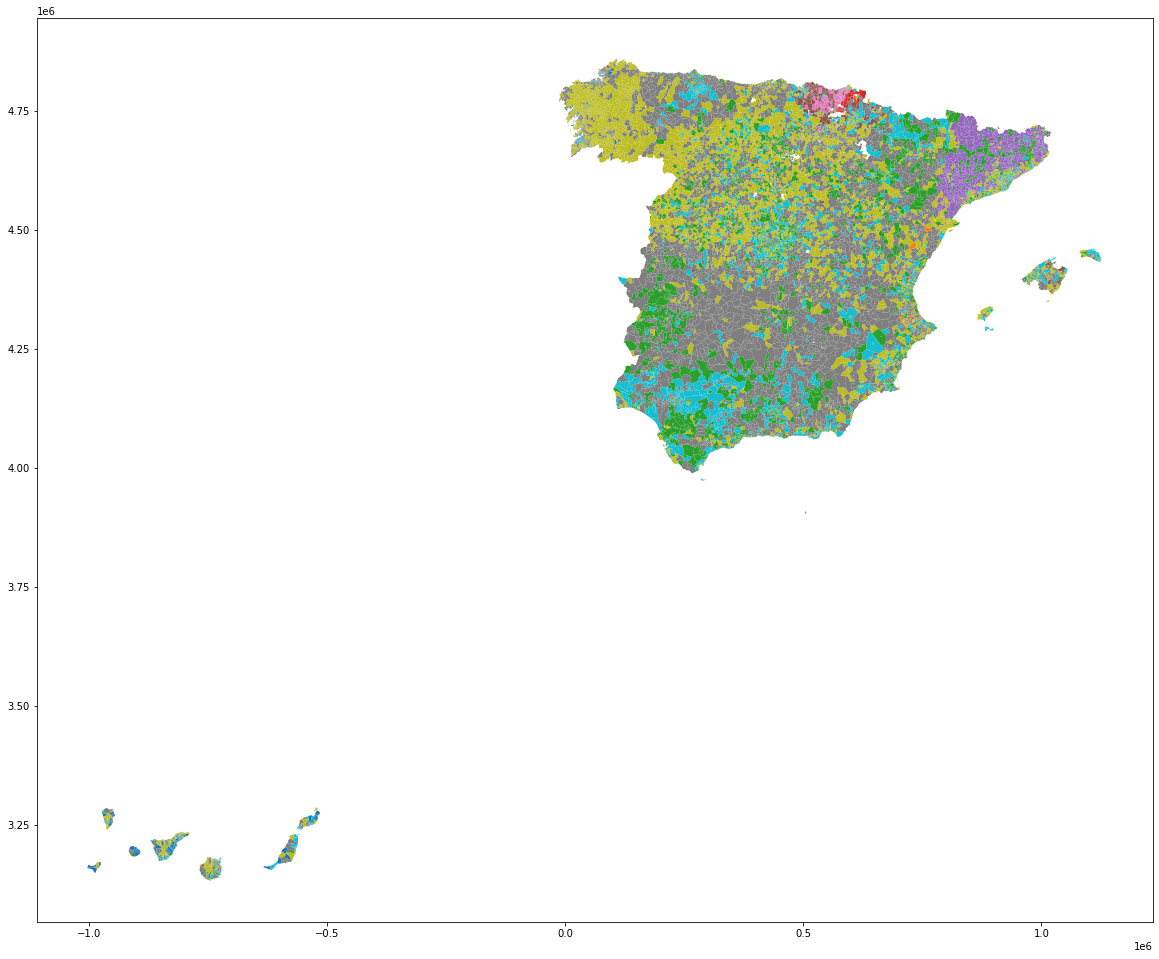

In [30]:
secciones.plot(column = 'Segundo', figsize = (20,20))

Tenemos que definir los colores que queremos según los valores que aparezcan el la columna que queramos pintar. Pasamos esa información en un diccionario.

In [31]:
color_map = {'BNG': 'green',
 'CC': '#C0CB2F',
 'Compromis': '#C29518',
 'Cs': 'orange',
 'ERC': 'yellow',
 'GBai': '#C93011',
 'JxC': '#3201AB',
 'Otros': 'cyan',
 'PACMA': 'pink',
 'PNV': '#8ED8A5',
 'PP': '#1604FA',
 'PRC': '#1E8E41',
 'PSOE': 'red',
 'UP': 'purple',
 'VOX': 'lightgreen'}

De esta forma geopandas hace el mapeo con los colores; podemos ver cómo queda con el partido ganador en las secciones del municipio de Madrid. No hemos conseguido implantar la leyenda, por desgracia, pero es fácilmente interpretable.

(4455000.0, 4500000.0)

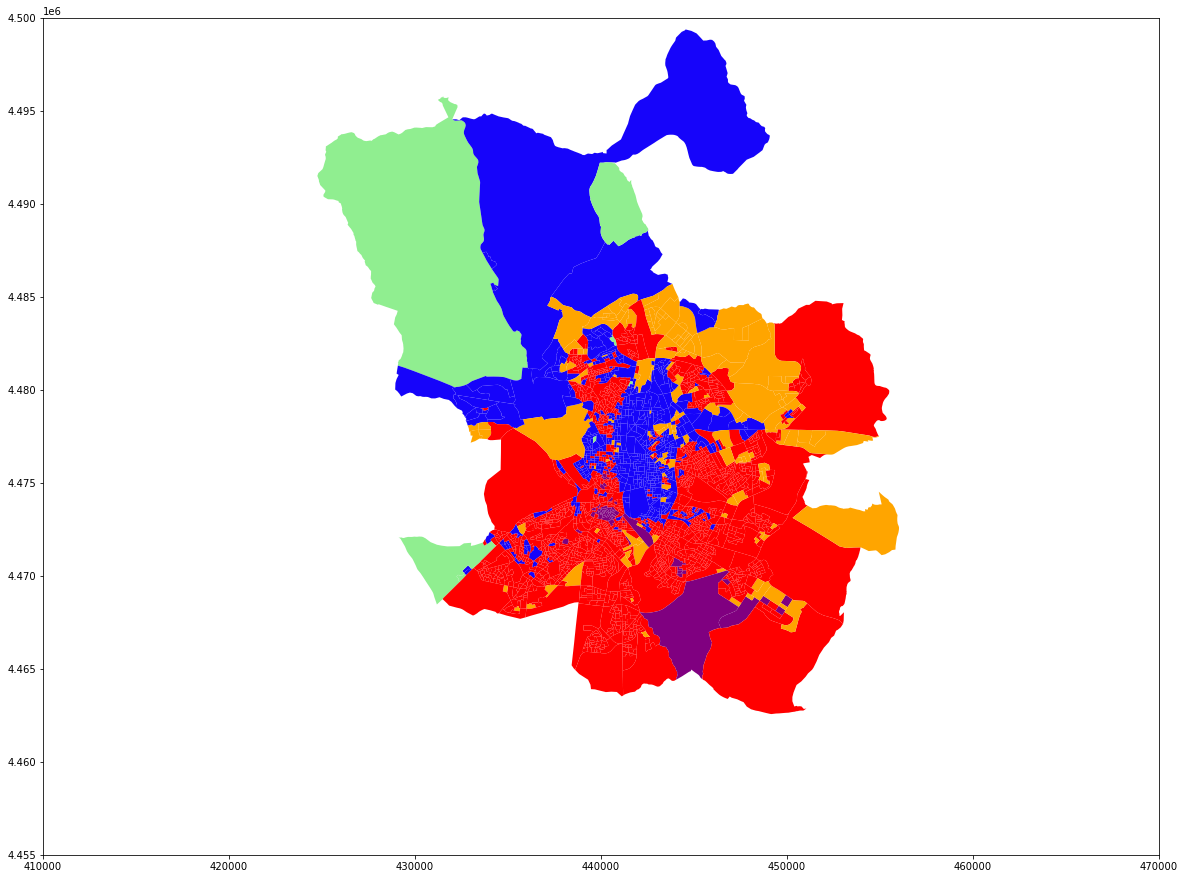

In [32]:
ax = secciones.loc[secciones['CUMUN'] == '28079'].plot(figsize = (20,20), color = secciones.loc[secciones['CUMUN'] == '28079']['Ganador'].map(color_map), edgecolor = 'white', linewidth = 0.01)

ax.set_xlim([410000, 470000])
ax.set_ylim([4455000, 4500000])

In [33]:
color_map

{'BNG': 'green',
 'CC': '#C0CB2F',
 'Compromis': '#C29518',
 'Cs': 'orange',
 'ERC': 'yellow',
 'GBai': '#C93011',
 'JxC': '#3201AB',
 'Otros': 'cyan',
 'PACMA': 'pink',
 'PNV': '#8ED8A5',
 'PP': '#1604FA',
 'PRC': '#1E8E41',
 'PSOE': 'red',
 'UP': 'purple',
 'VOX': 'lightgreen'}

Podemos concretar incluso un poco más dentro de la Comunidad de Madrid.

(4465000.0, 4485000.0)

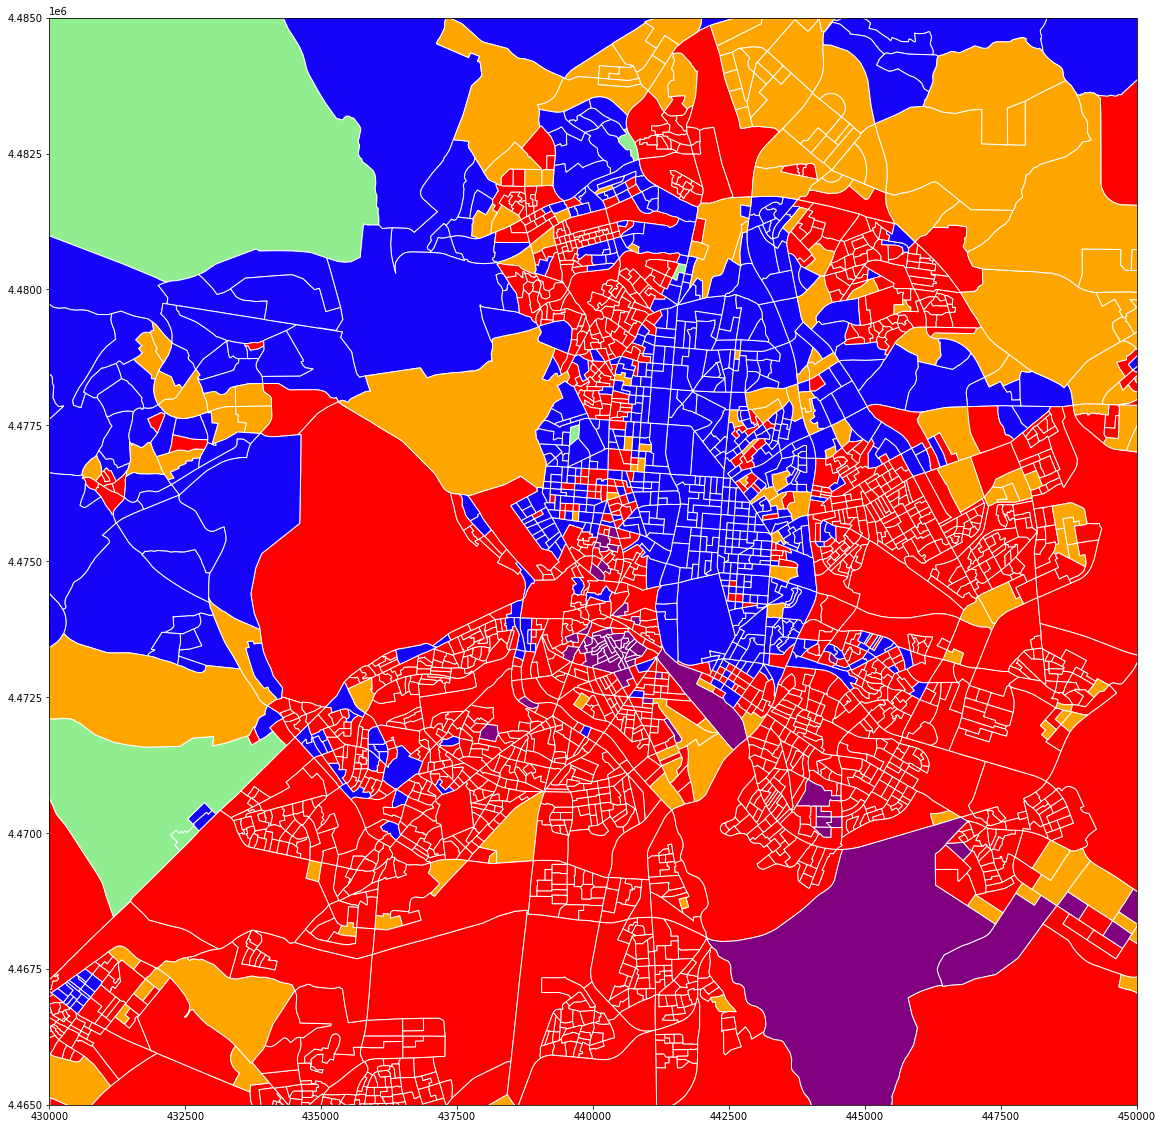

In [34]:
ax = secciones.loc[secciones['NPRO'] == 'Madrid'].plot(figsize = (20,20), color = secciones.loc[secciones['NPRO'] == 'Madrid']['Ganador'].map(color_map), edgecolor = 'white', linewidth = 1)
ax.set_xlim([430000, 450000])
ax.set_ylim([4465000, 4485000])

Este es un ejemplo para toda España.

<AxesSubplot:>

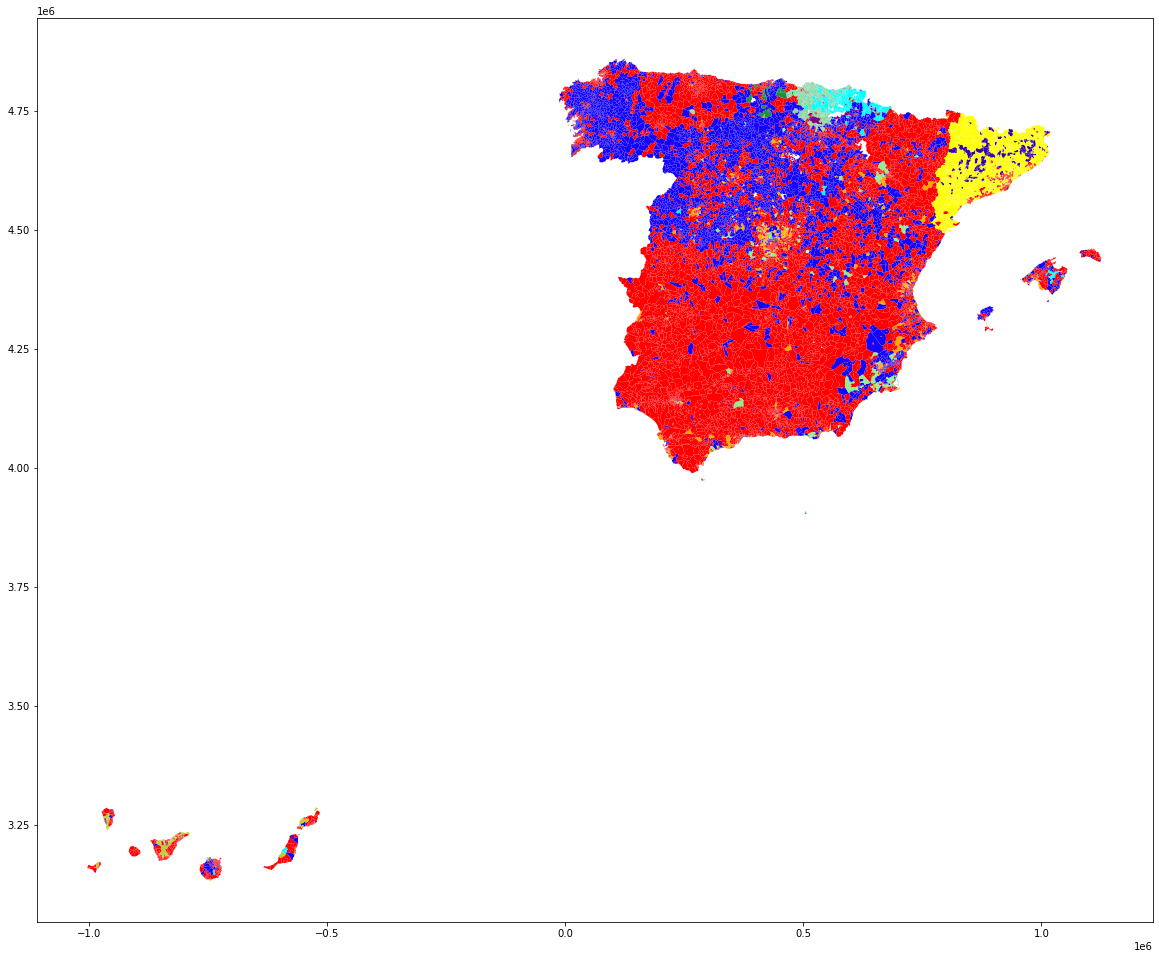

In [35]:
secciones.plot(figsize = (20,20), color = secciones['Ganador'].map(color_map), edgecolor = 'white', linewidth = 0.01)

Podemos mapear columnas de valores continuos con escalas de colores predeterminadas, en este caso las de renta personal de 2017. Como se ve, en el centro del mapa (Madrid) hay unos valores muy superiores al resto, ya que se ve el color verde.

<AxesSubplot:>

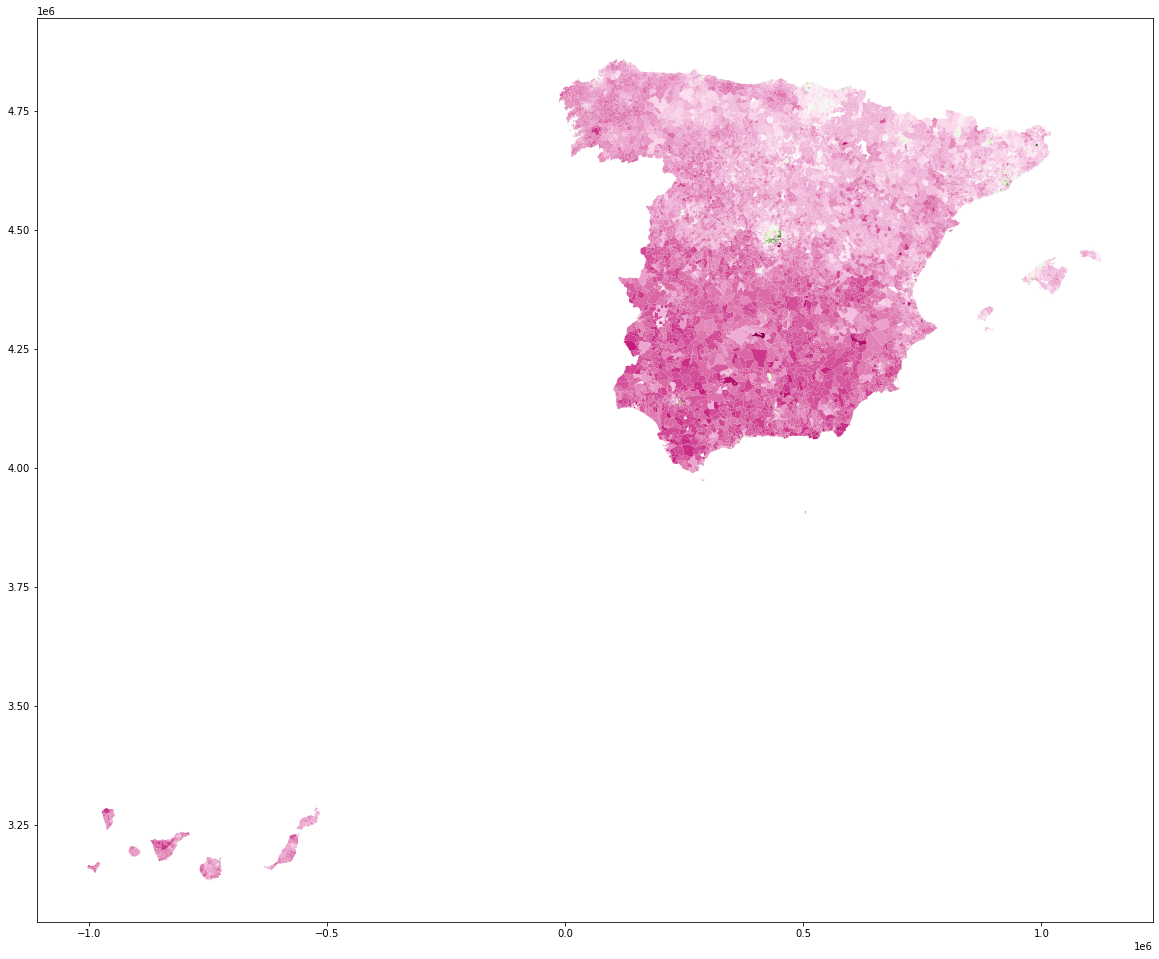

In [36]:
secciones.plot(figsize = (20,20), column = 'Renta persona 2017', edgecolor = 'white', linewidth = 0.01, cmap = plt.cm.get_cmap('PiYG'))

Este contraste se ve claramente haciendo un zoom en el centro de Madrid.

(4465000.0, 4485000.0)

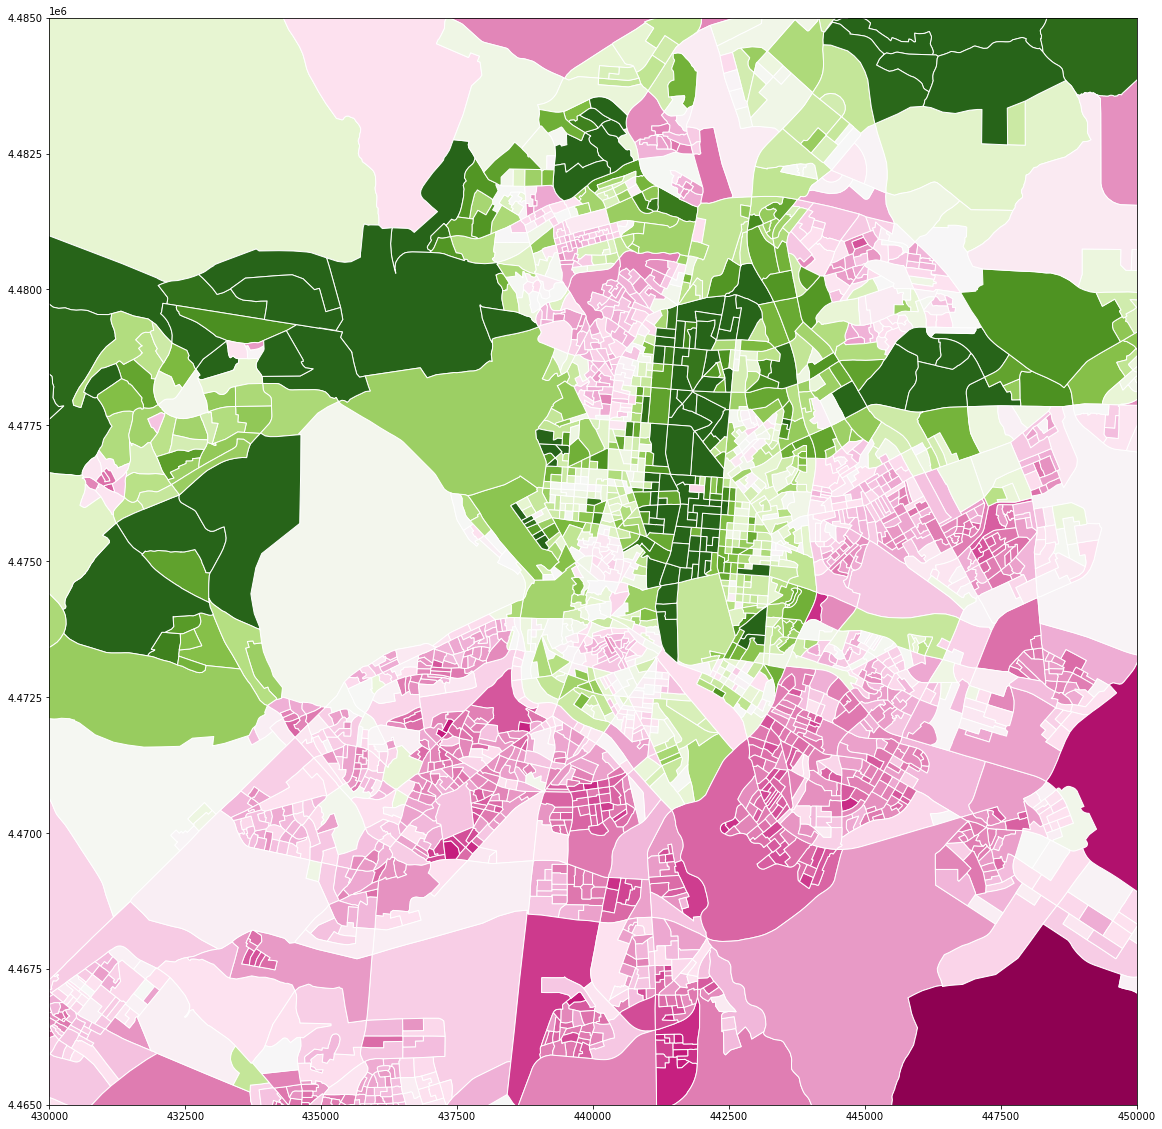

In [37]:
ax = secciones.loc[secciones['NPRO'] == 'Madrid'].plot(figsize = (20,20), column = 'Renta persona 2017', cmap = plt.cm.get_cmap('PiYG'), edgecolor = 'white', linewidth = 1)
ax.set_xlim([430000, 450000])
ax.set_ylim([4465000, 4485000])

Por último hacemos el ejercicio de ver la densidad de población. Por supuesto, podemos definir nuevas columnas en el dataframe. Las densidades que se obtienen son muy variables, por lo que en perspectiva quizá habria que aplicarlas un logaritmo.

In [38]:
secciones['Den. Población (hab/Km2)'] = secciones['Población Total'] / secciones['Shape_area'] * 1000000

In [39]:
secciones['Población Total'].sum()

47026208

In [40]:
secciones['Shape_area'].sum() / 1000000

506095.0184911206

In [41]:
secciones['Den. Población (hab/Km2)'].describe()

count     36317.000000
mean      14352.732530
std       18462.856240
min           0.234093
25%         106.749099
50%        6540.483105
75%       22969.608578
max      188179.914261
Name: Den. Población (hab/Km2), dtype: float64

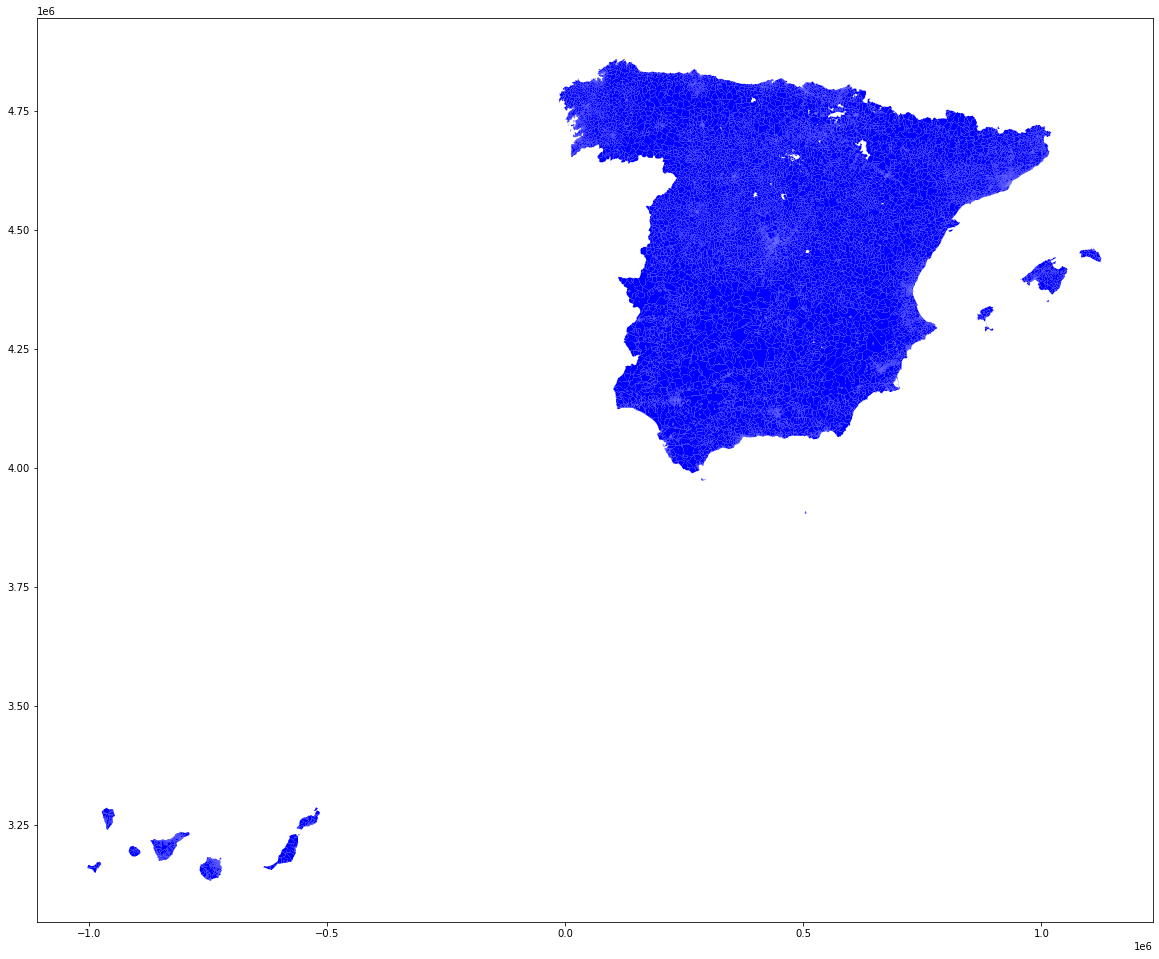

In [42]:
ax = secciones.plot(figsize = (20,20), column = 'Den. Población (hab/Km2)' , edgecolor = 'white', linewidth = 0.01, cmap = plt.cm.get_cmap('bwr'))


En definitiva creesmos que Geopandas es una librería muy útiles para la visualización, al menos en un primer momento. Por otro lado, ésta contiene métodos geográficos que nos serán muy útiles para ver la equivalencia de las secciones electorales de una elección a otra, algo muy importante y que trataremos en otro cuaderno.

In [ ]:
#por si ayuda en un futuro para la visualización, guardamos una copia del dataframe merged de los datos geográficos con los datos de las elecciones de abril2019 unificados. 
secciones.to_file("secciones_merge_A19_geojson.geojson", driver='GeoJSON')